In [1]:
from pathlib import Path
from freqtrade.configuration import Configuration
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics
import math
import pathlib

config = Configuration.from_files(['user_data/config_binance_zone.json'])
# Optionally, use existing configuration file
# config = Configuration.from_files(["config.json"])

# Define some constants
config["timeframe"] = "4h"
# Name of the strategy class
config["strategy"] = "YoyoActionStrategy"
# Location of the data
data_location = Path(config['user_data_dir'], 'data', 'binance')
# print("Data path "+data_location)
# Pair to analyze - Only use one pair here
pair = "BTC/USDT"
# F:\\Projects\\freqtrade\\user_data
# if backtest_dir points to a directory, it'll automatically load the last backtest file.
backtest_dir_1 = config["user_data_dir"] / "backtest_results/backtest-result-MACD-2021-12-15_14-39-54.json"
backtest_dir_2 = config["user_data_dir"] / "backtest_results/backtest-result-MACD-ARTFIRST-2021-12-15_15-56-05.json"
backtest_dir_3 = config["user_data_dir"] / "backtest_results/backtest-result-2021-12-31_09-37-29.json"

In [2]:
from freqtrade.data.history import load_pair_history
from freqtrade.data.btanalysis import load_backtest_data, load_backtest_stats

stats_1 = load_backtest_stats(backtest_dir_1)
stats_2 = load_backtest_stats(backtest_dir_2)
stats_3 = load_backtest_stats(backtest_dir_3)

In [3]:
# MACD-ATR
results_daily_profit_2 = pd.DataFrame.from_dict(stats_2['strategy']['YoyoActionStrategy']['daily_profit'])

df_daily_profit_2 = pd.DataFrame(results_daily_profit_2)

# df_daily_profit_2 = df_daily_profit_2.rename(columns = {'0' : 'date', '1' : 'return'})
# 
df_daily_profit_2.columns = ['date', 'return']
df_daily_profit_2['summary'] = 0

df_daily_profit_2['summary'] = df_daily_profit_2['return'].cumsum()
df_daily_profit_2 = df_daily_profit_2.dropna()
df_daily_profit_2

results_daily_profit_1 = pd.DataFrame.from_dict(stats_1['strategy']['YoyoActionStrategy']['daily_profit'])

df_daily_profit_1 = pd.DataFrame(results_daily_profit_1)

# df_daily_profit_2 = df_daily_profit_2.rename(columns = {'0' : 'date', '1' : 'return'})
# 
df_daily_profit_1.columns = ['date', 'return']
df_daily_profit_1['summary'] = 0

df_daily_profit_1['summary'] = df_daily_profit_1['return'].cumsum()
df_daily_profit_1 = df_daily_profit_1.dropna()

#   Pair |   Buys |  (profit_mean)  Avg Profit % |   profit_sum_pct(Cum Profit %) |  (profit_total_abs) Tot Profit USDT |   (profit_total)Tot Profit % |     Avg Duration |   Win  Draw  Loss  Win% 

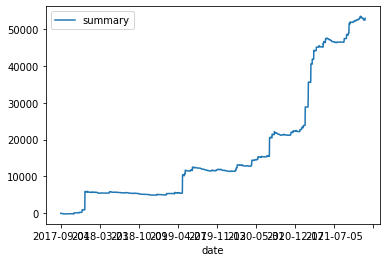

In [4]:
df_daily_profit_2.plot('date',['summary'])
# results_daily_profit_2.plot('date',['close'])
plt.show()

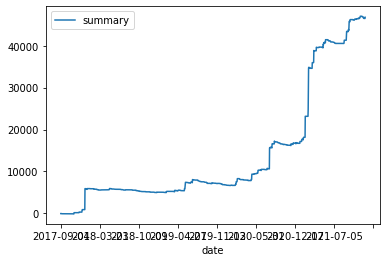

In [5]:
df_daily_profit_1.plot('date',['summary'])
# results_daily_profit_2.plot('date',['close'])
plt.show()

In [6]:
# MACD
results_per_pair_2 = pd.DataFrame.from_dict(stats_1['strategy']['YoyoActionStrategy']['results_per_pair'])
results_per_pair_2

,key,trades,profit_mean,profit_mean_pct,profit_sum,profit_sum_pct,profit_total_abs,profit_total,profit_total_pct,duration_avg,wins,draws,losses
0,BNB/USDT,66,0.257391,25.739054,16.987776,1698.78,8502.381824,1.700476,170.05,"13 days, 0:00:00",23,0,43
1,LUNA/USDT,18,0.801253,80.125269,14.422548,1442.25,7218.485474,1.443697,144.37,"15 days, 11:47:00",8,0,10
2,MATIC/USDT,51,0.246110,24.610953,12.551586,1255.16,6282.068923,1.256414,125.64,"9 days, 19:13:00",16,0,35
3,SOL/USDT,19,0.600097,60.009698,11.401843,1140.18,5706.622218,1.141324,114.13,"12 days, 20:38:00",4,0,15
4,BAND/USDT,39,0.257331,25.733132,10.035922,1003.59,5022.978758,1.004596,100.46,"9 days, 4:43:00",8,0,31
5,LINK/USDT,50,0.113718,11.371776,5.685888,568.59,2845.786890,0.569157,56.92,"11 days, 14:48:00",15,0,35
6,ETH/USDT,75,0.069324,6.932402,5.199301,519.93,2602.250259,0.520450,52.05,"11 days, 6:59:00",24,0,51
7,BTC/USDT,67,0.062369,6.236869,4.178702,417.87,2091.440356,0.418288,41.83,"12 days, 18:13:00",24,0,43
8,OMG/USDT,38,0.108109,10.810878,4.108134,410.81,2056.120825,0.411224,41.12,"11 days, 9:47:00",12,0,26
9,NEAR/USDT,16,0.253634,25.363450,4.058152,405.82,2031.105058,0.406221,40.62,"14 days, 2:15:00",8,0,8


In [7]:
# MACD-ATR-FIRST
results_per_pair_3 = pd.DataFrame.from_dict(stats_3['strategy']['YoyoActionStrategy']['results_per_pair'])
results_per_pair_3
#   Pair |   Buys |  (profit_mean)  Avg Profit % |   profit_sum_pct(Cum Profit %) |  (profit_total_abs) Tot Profit USDT |   (profit_total)Tot Profit % |     Avg Duration |   Win  Draw  Loss  Win% 

,key,trades,profit_mean,profit_mean_pct,profit_sum,profit_sum_pct,profit_total_abs,profit_total,profit_total_pct,duration_avg,wins,draws,losses
0,BNB/USDT,66,0.257391,25.739054,16.987776,1698.78,8502.381824,1.700476,170.05,"13 days, 0:00:00",23,0,43
1,LUNA/USDT,18,0.801253,80.125269,14.422548,1442.25,7218.485474,1.443697,144.37,"15 days, 11:47:00",8,0,10
2,MATIC/USDT,51,0.246110,24.610953,12.551586,1255.16,6282.068923,1.256414,125.64,"9 days, 19:13:00",16,0,35
3,SOL/USDT,19,0.600097,60.009698,11.401843,1140.18,5706.622218,1.141324,114.13,"12 days, 20:38:00",4,0,15
4,BAND/USDT,39,0.257331,25.733132,10.035922,1003.59,5022.978758,1.004596,100.46,"9 days, 4:43:00",8,0,31
5,LINK/USDT,50,0.113718,11.371776,5.685888,568.59,2845.786890,0.569157,56.92,"11 days, 14:48:00",15,0,35
6,ETH/USDT,75,0.069324,6.932402,5.199301,519.93,2602.250259,0.520450,52.05,"11 days, 6:59:00",24,0,51
7,BTC/USDT,67,0.062369,6.236869,4.178702,417.87,2091.440356,0.418288,41.83,"12 days, 18:13:00",24,0,43
8,OMG/USDT,38,0.108109,10.810878,4.108134,410.81,2056.120825,0.411224,41.12,"11 days, 9:47:00",12,0,26
9,NEAR/USDT,16,0.253634,25.363450,4.058152,405.82,2031.105058,0.406221,40.62,"14 days, 2:15:00",8,0,8
